In [1]:
!pip install numpy pandas scikit-learn matplotlib seaborn

### Data Loading and Preprocessing

In [7]:
from sklearn.datasets import make_moons
# Generate 500 samples with noise to make it challenging
X, y = make_moons(n_samples=500, noise=0.25, random_state=42)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.7, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.fit_transform(X_val)

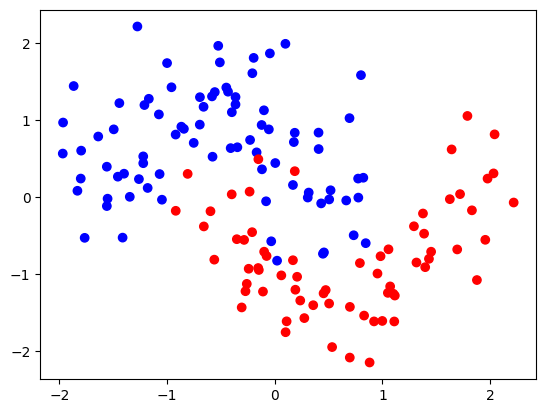

In [22]:
import matplotlib.pyplot as plt

plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap='bwr')

### Model 1: The linear SVM





In [10]:
from sklearn.svm import SVC
linear_model = SVC(kernel='linear', C=1.0, random_state=42)
linear_model.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [12]:
y_pred = linear_model.predict(X_val_scaled)

In [19]:
from sklearn.metrics import classification_report, accuracy_score

print("Classification Report:")
print(classification_report(y_val, y_pred))

print("Accuracy:")
print(accuracy_score(y_val, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       168
           1       0.90      0.79      0.84       182

    accuracy                           0.84       350
   macro avg       0.85      0.85      0.84       350
weighted avg       0.85      0.84      0.84       350

Accuracy:
0.8428571428571429


on reducing c value from 1.0 to 0.01 we might get a reduced accuracy as misclassified points would also be allowed.

### Model 2 and 3: The Kernel Trick

#### RBF Kernel Model


In [15]:
rbf_model = SVC(kernel='rbf',C=1.0,gamma='scale',random_state=42)
rbf_model.fit(X_train_scaled, y_train)

y_rbf_pred = rbf_model.predict(X_val_scaled)

In [16]:
print("Classification Report:")
print(classification_report(y_val, y_rbf_pred))

print("Accuracy:")
print(accuracy_score(y_val, y_rbf_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       168
           1       1.00      0.82      0.90       182

    accuracy                           0.91       350
   macro avg       0.92      0.91      0.91       350
weighted avg       0.92      0.91      0.91       350

Accuracy:
0.9085714285714286


#### Polynomial Kernel

In [17]:
poly_model = SVC(kernel='poly',degree=3,random_state=42)

poly_model.fit(X_train_scaled, y_train)
y_poly_pred = poly_model.predict(X_val_scaled)

In [18]:
print("Classification Report:")
print(classification_report(y_val, y_poly_pred))

print("Accuracy:")
print(accuracy_score(y_val, y_poly_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.99      0.87       168
           1       0.99      0.73      0.84       182

    accuracy                           0.85       350
   macro avg       0.88      0.86      0.85       350
weighted avg       0.89      0.85      0.85       350

Accuracy:
0.8542857142857143


In [21]:
import pandas as pd

ac1 = accuracy_score(y_val, y_pred)
ac2 = accuracy_score(y_val, y_rbf_pred)
ac3 = accuracy_score(y_val, y_poly_pred)

results = pd.DataFrame({
    'Kernel': ['Linear', 'RBF', 'Polynomial'],
    'Validation Accuracy': [ac1, ac2, ac3]
})

print(results)

## rbf performed the best

       Kernel  Validation Accuracy
0      Linear             0.842857
1         RBF             0.908571
2  Polynomial             0.854286


#### Hyperparameter Tuning

In [23]:
param_grid = {
'C': [0.1, 1, 10, 100],
'gamma': [0.1, 1, 10, 100],
'kernel': ['rbf']
}

In [24]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(SVC(random_state=42), param_grid, refit=True, verbose=2, cv=5, scoring='accuracy')
grid

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=2)

In [25]:
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=10, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=10

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=2)

In [26]:
print(grid.best_params_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [27]:
print(grid.best_score_)

0.9466666666666667


### Final Evaluation

In [28]:
final_predictions = grid.predict(X_val_scaled)

In [29]:
print(classification_report(y_val, final_predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       168
           1       1.00      0.84      0.91       182

    accuracy                           0.92       350
   macro avg       0.93      0.92      0.92       350
weighted avg       0.93      0.92      0.92       350



In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, final_predictions)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[168   0]
 [ 29 153]]


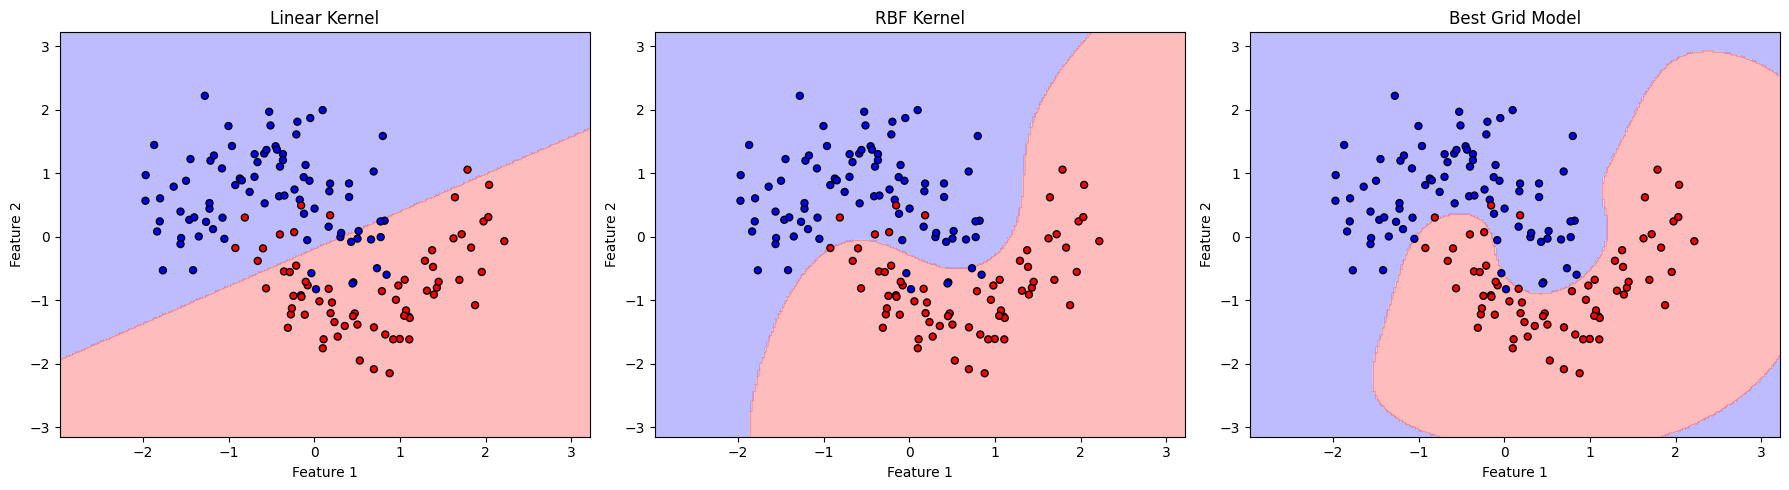

In [31]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')

    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', s=25)
    ax.set_title(title)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

plot_decision_boundary(linear_model, X_train_scaled, y_train, axes[0], "Linear Kernel")
plot_decision_boundary(rbf_model, X_train_scaled, y_train, axes[1], "RBF Kernel")
plot_decision_boundary(grid.best_estimator_, X_train_scaled, y_train, axes[2], "Best Grid Model")

plt.tight_layout()
plt.show()
